<a href="https://colab.research.google.com/github/Ayan1311819/Machine_Learning/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#AUTOENCODER NETWORK IMPLEMENTATION
'''

0) Goal
1) Specification of dataset
2) Model
3) loss function (regularization) | real life metrics
4) optimization procedure (how much and how to update)

'''

In [ ]:
import torch

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28 * 28, 512), # 784 to 256
            nn.ReLU(True),
            nn.Linear(512,256),
            nn.ReLU(True),
            nn.Linear(256,128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 44), #Latent space of 44 dimensions
        )
    self.decoder = nn.Sequential(
            nn.Linear(44, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128,256),
            nn.ReLU(True),
            nn.Linear(256,512),
            nn.ReLU(True),
            nn.Linear(512, 28 * 28), #reconstruction
            nn.Sigmoid()  #between [0,1]
        )
    #defining forward pass
  def forward(self,x):
    latent = self.encoder(x)
    reconstruct = self.decoder(latent)
    return reconstruct

#Preparing the dataset and dataloader
transform = transforms.Compose([
    transforms.ToTensor(),  #img to pytorch tensors
    #transforms.Normalize((0.5,), (0.5,))  #normalizing images to [-1,1] : imo, ReLu works better in this range
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

model = Autoencoder()

loss_func = nn.BCELoss()

optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
#Training loop
epochs = 10
for i in range(epochs):
  for data in train_loader:
    img, _ = data
    img = img.view(img.size(0), -1)
    output = model(img) #implicitly calls forward
    loss = loss_func(output,img)

    optimizer.zero_grad() #refreshes the gradients to avoid accumulation
    loss.backward() #compute gradients of all param wrt to loss
    optimizer.step() #updates params in desired direction to minimize loss

  print(f'Epoch [{i+1}/{epochs}], Loss: {loss.item():.4f}')



Epoch [1/10], Loss: 0.1705
Epoch [2/10], Loss: 0.1406
Epoch [3/10], Loss: 0.1437
Epoch [4/10], Loss: 0.1377
Epoch [5/10], Loss: 0.1211
Epoch [6/10], Loss: 0.1195
Epoch [7/10], Loss: 0.1248
Epoch [8/10], Loss: 0.1033
Epoch [9/10], Loss: 0.1223
Epoch [10/10], Loss: 0.1113


In [ ]:
c=0
for data in train_loader:
  c+=1
print(c)

938


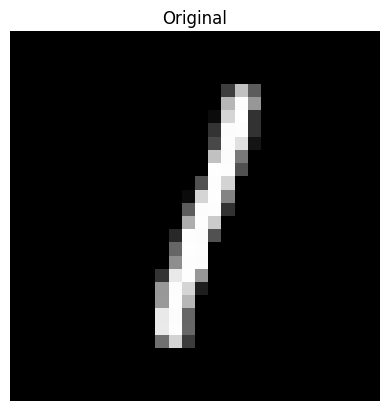

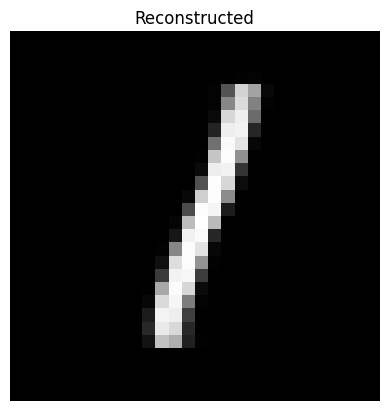

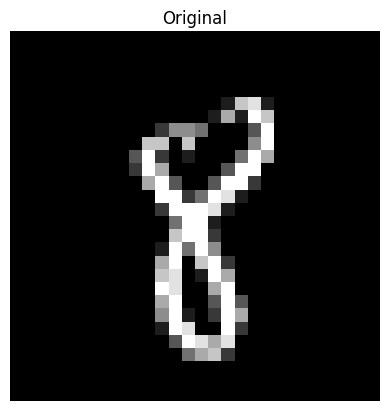

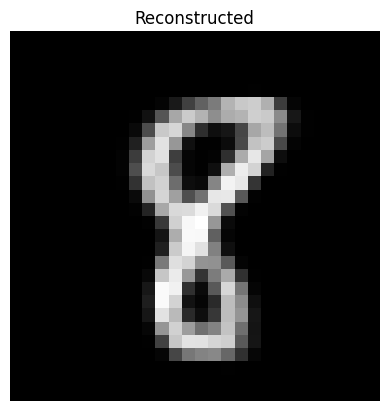

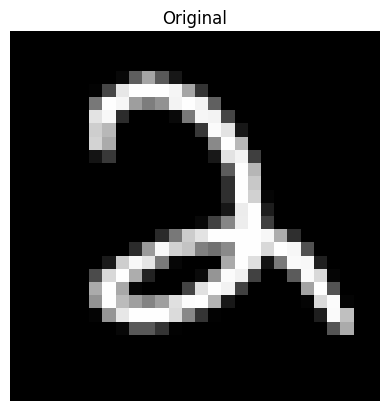

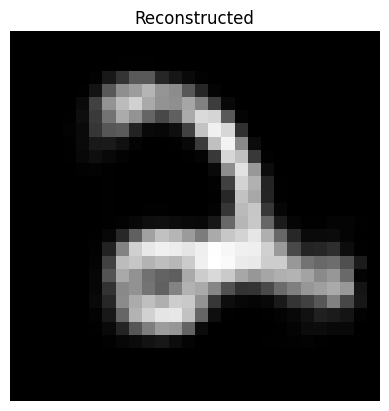

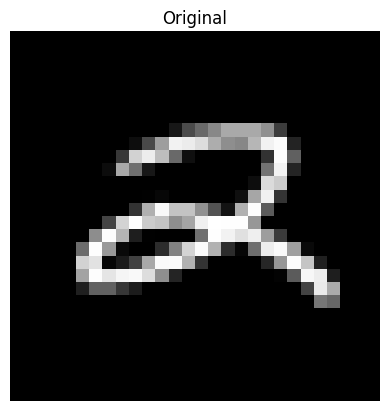

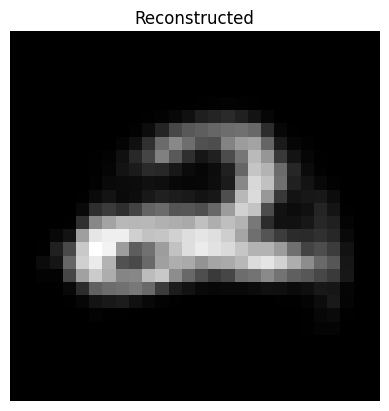

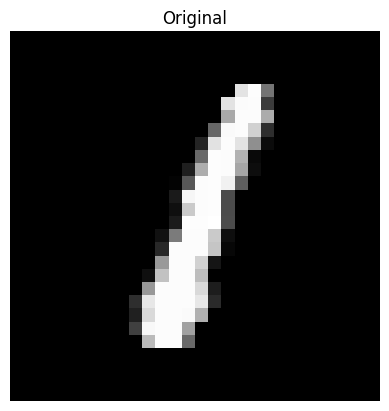

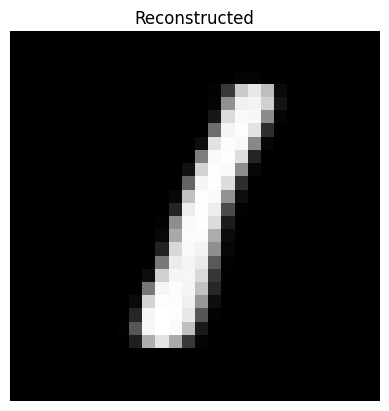

In [ ]:
#To visualize original vs reconstructed images
import matplotlib.pyplot as plt
def imshow(img, title):
    npimg = img.cpu().detach().numpy()
    plt.imshow(npimg, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

dataiter = iter(train_loader)
images, _ = next(dataiter)
images_flat = images.view(images.size(0), -1)

reconstructed = model(images_flat)
reconstructed = reconstructed.view(-1, 1, 28, 28)

for idx in range(5):
    imshow(images[idx].squeeze(), title='Original')
    imshow(reconstructed[idx].squeeze(), title='Reconstructed')

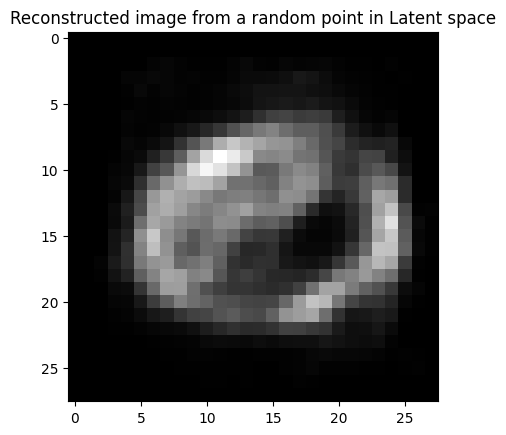

In [ ]:
latent_vector = torch.randn(1, 44)

re_image = model.decoder(latent_vector)

re_image = re_image.view(28, 28).detach().numpy()

plt.imshow(re_image, cmap='gray')
plt.title("Reconstructed image from a random point in Latent space")
plt.show()



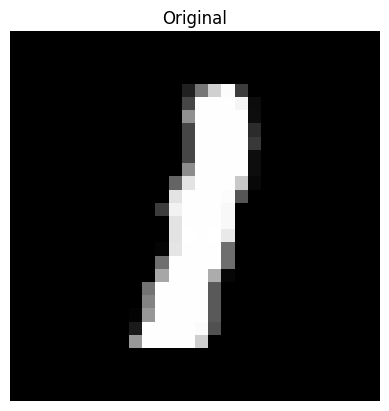

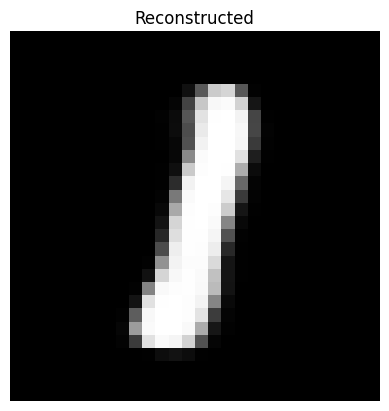

In [ ]:
dataiter = iter(train_loader)
images, _ = next(dataiter) #returns tuple of images in a batch
image = images[0].view(1, -1)

reconstructed = model(image)
latent_vector = model.encoder(image)
reconstructed = reconstructed.view(-1, 1, 28, 28)

imshow(image.view(28,28).squeeze(), title='Original')
imshow(reconstructed.squeeze(), title='Reconstructed')

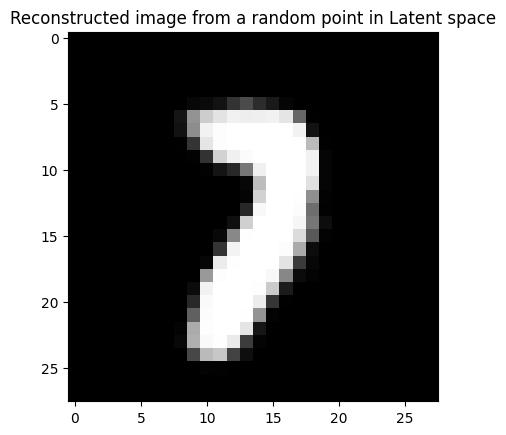

In [ ]:
#lets look for images near the latent space representation of image and see if we be able to generate something
noise = torch.randn_like(latent_vector) * 2
new_latent_vector = latent_vector + noise

generated_image = model.decoder(new_latent_vector)

generated_image = generated_image.view(28, 28).detach().numpy()

plt.imshow(generated_image, cmap='gray')
plt.title("Generated image from a point near to the existing point in latent space")
plt.show()